In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Univariate Analysis

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

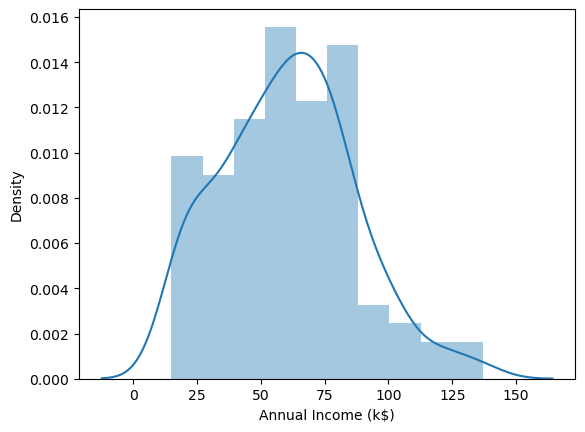

In [10]:
sns.distplot(df['Annual Income (k$)']);

In [11]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

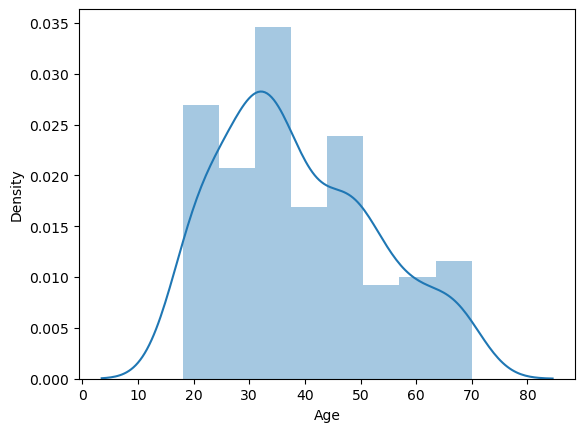

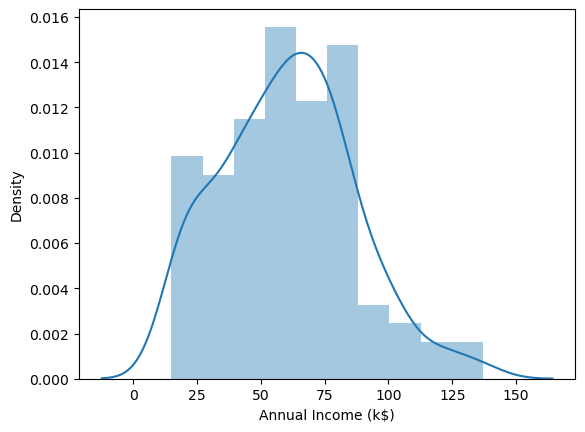

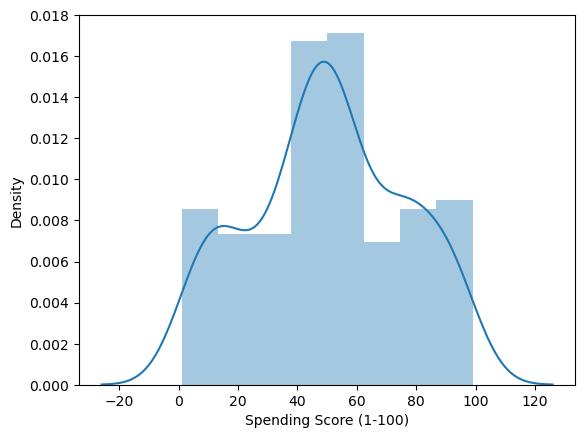

In [12]:
columns_=[ 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns_ :
        plt.figure()
        sns.distplot(df[i])

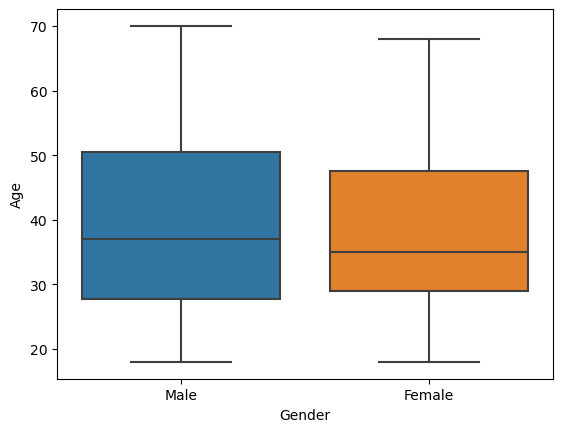

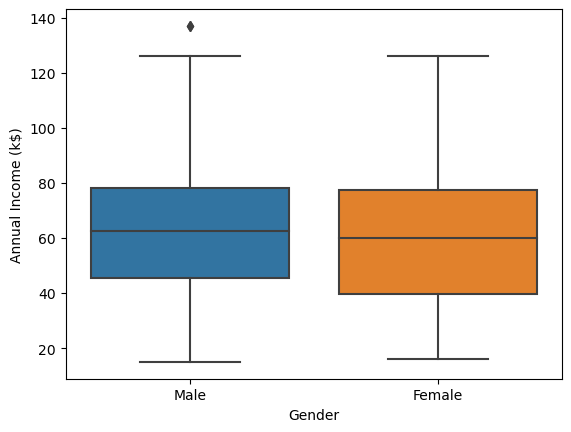

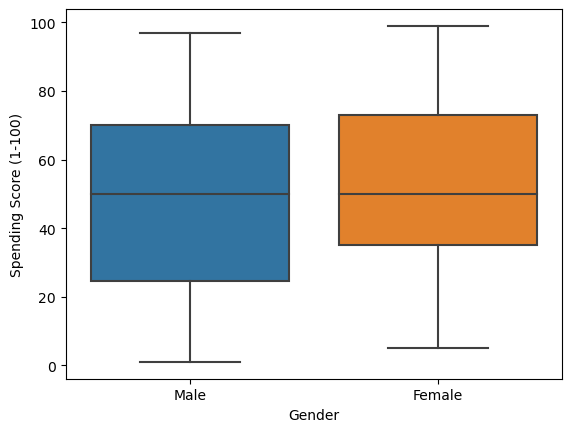

In [18]:
columns_=[ 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns_ :
        plt.figure()
        sns.boxplot(data=df,x='Gender',y=df[i]);

In [23]:
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

## Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

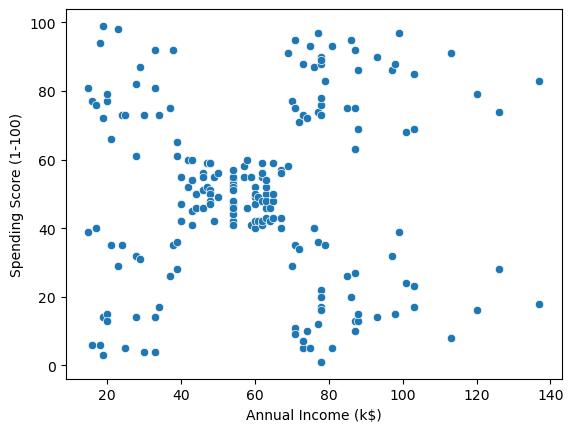

In [24]:
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)')

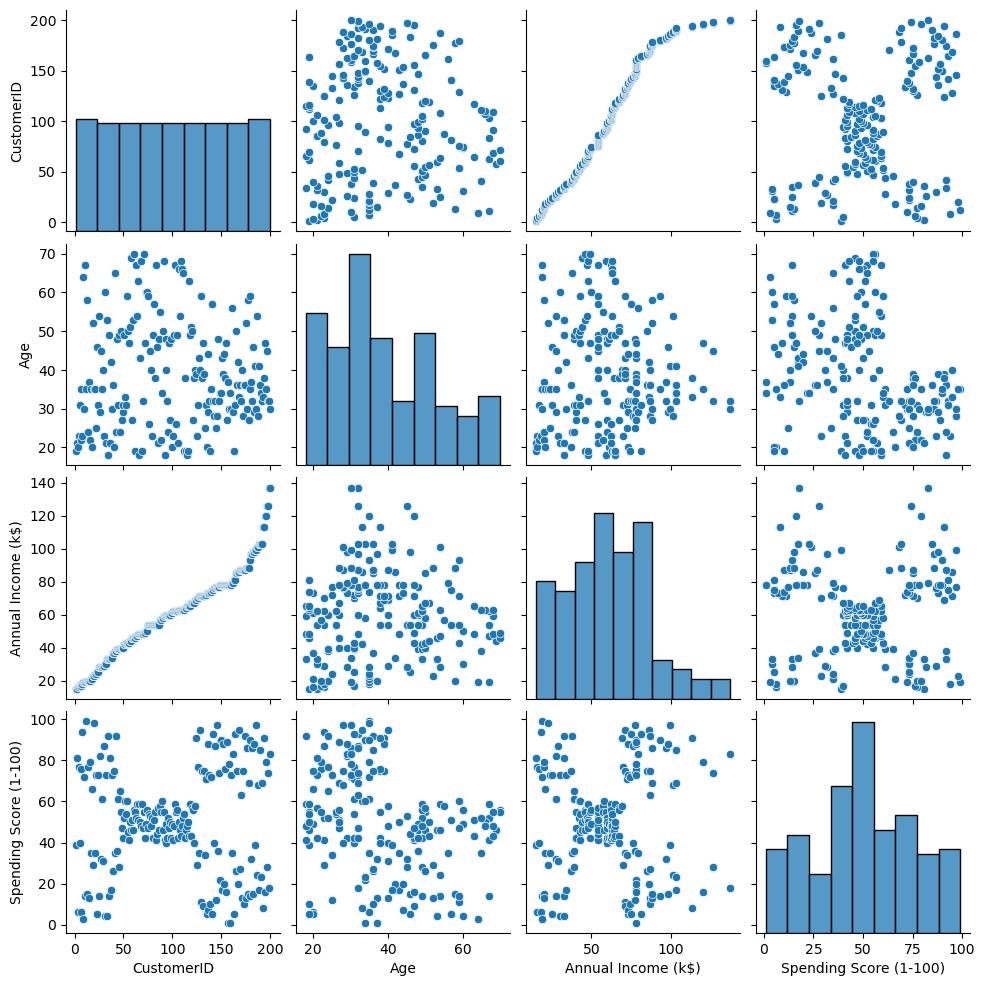

In [25]:
sns.pairplot(df)

In [26]:
df=df.drop('CustomerID',axis=1)

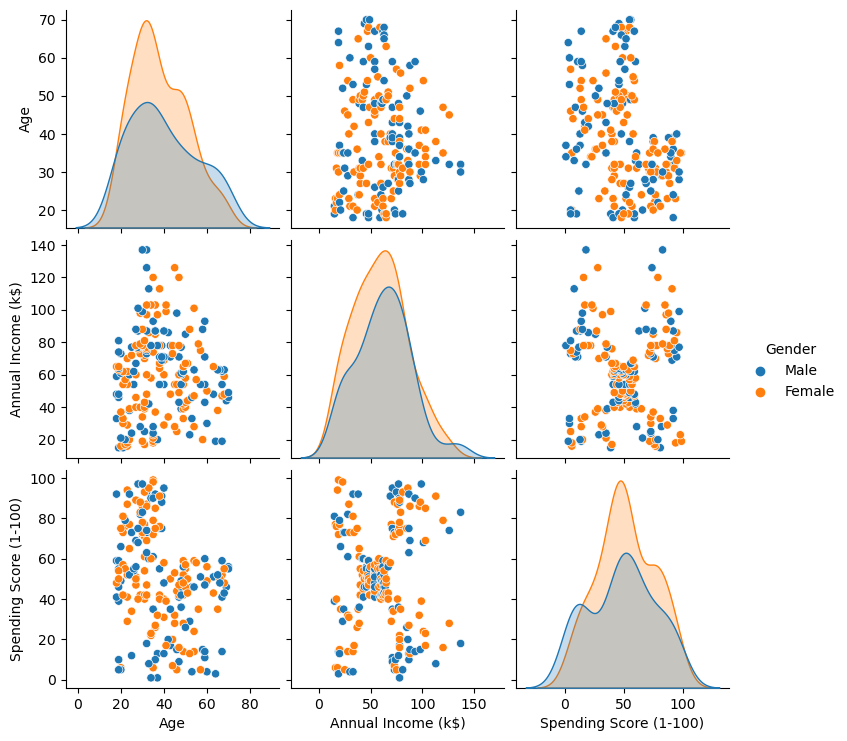

In [28]:
sns.pairplot(df,hue='Gender')

In [29]:
df.groupby(['Gender'])['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [30]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

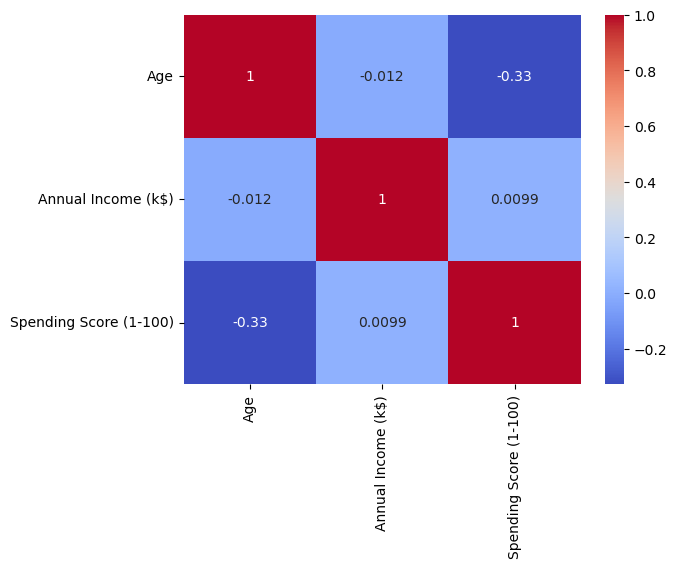

In [31]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

# Clustering

In [52]:
clustering1 = KMeans(n_clusters=3)

In [53]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [54]:
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [55]:
df['Income Cluster'] = clustering1.labels_

In [56]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),hue,Income Cluster
0,Male,19,15,39,Male,1
1,Male,21,15,81,Male,1
2,Female,20,16,6,Female,1
3,Female,23,16,77,Female,1
4,Female,31,17,40,Female,1


In [57]:
df['Income Cluster'].value_counts()

0    90
1    74
2    36
Name: Income Cluster, dtype: int64

In [58]:
clustering1.inertia_

23517.330930930926

In [59]:
inertia_scores=[]
for i in range(1,11) :
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [60]:
inertia_scores

[137277.28000000003,
 48660.88888888889,
 23517.330930930926,
 13278.112713472487,
 8481.496190476191,
 5050.904761904763,
 3949.2756132756135,
 2822.4996947496943,
 2173.287445887446,
 1737.1612554112553]

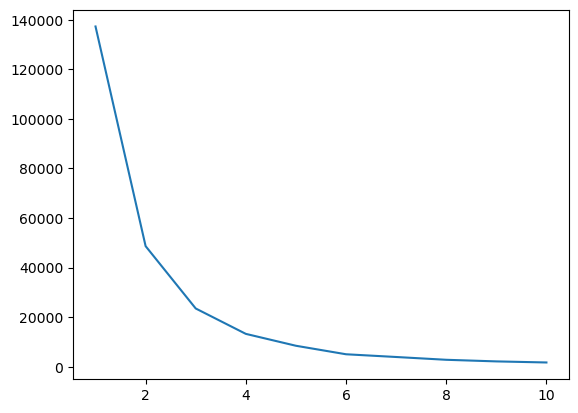

In [61]:
plt.plot(range(1,11),inertia_scores);

In [62]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'hue',
       'Income Cluster'],
      dtype='object')

In [75]:
df.groupby('Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,38.722222,67.088889,50.000000
1,39.500000,33.486486,50.229730
2,37.833333,99.888889,50.638889


In [83]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[[ 'Annual Income (k$)', 'Spending Score (1-100)']])
df['Spending and Income Cluster'] = clustering2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),hue,Income Cluster,Spending and Income Cluster
0,Male,19,15,39,Male,1,2
1,Male,21,15,81,Male,1,1
2,Female,20,16,6,Female,1,2
3,Female,23,16,77,Female,1,1
4,Female,31,17,40,Female,1,2


In [84]:
inertia_scores2=[]
for i in range(1,11) :
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)

In [85]:
inertia_scores2

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37265.86520484346,
 30241.343617936585,
 25018.576334776335,
 21826.936303231654,
 19669.71099830122]

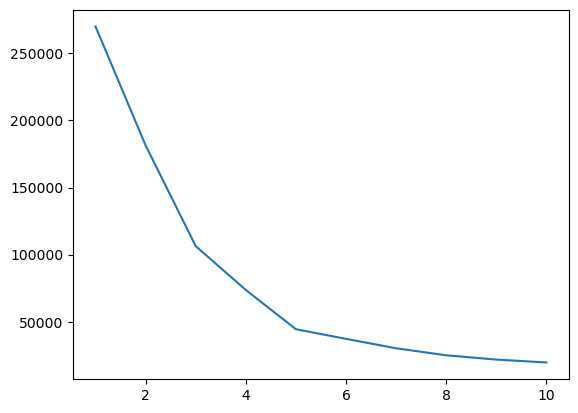

In [86]:
plt.plot(range(1,11),inertia_scores2);

In [94]:
centers=pd.DataFrame(clustering2.cluster_centers_)
centers.columns=['x','y']
centers

,x,y
0,55.296296,49.518519
1,25.727273,79.363636
2,26.304348,20.913043
3,86.538462,82.128205
4,88.200000,17.114286


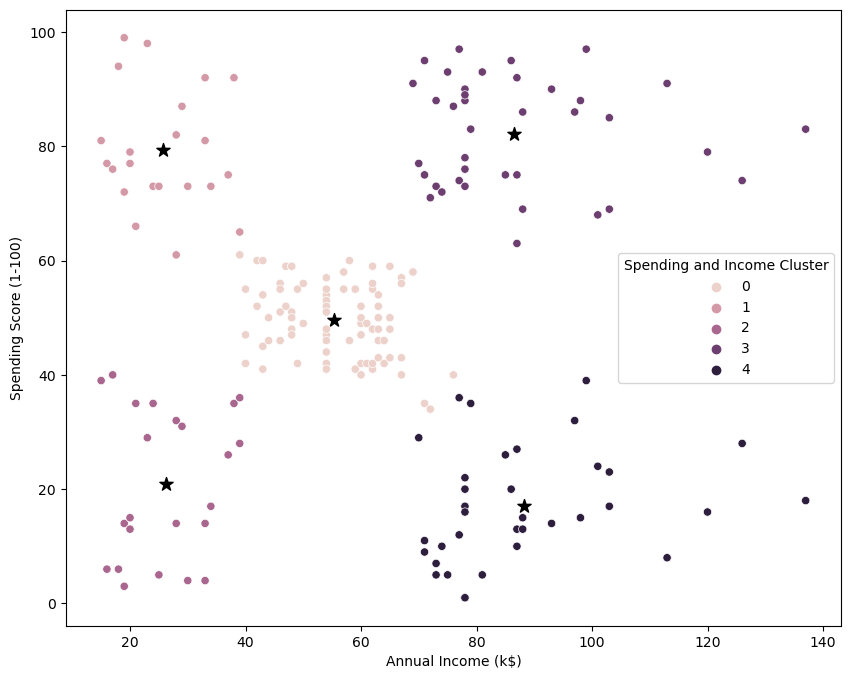

In [97]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)', hue='Spending and Income Cluster');

In [98]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.592593,0.407407
1,0.590909,0.409091
2,0.608696,0.391304
3,0.538462,0.461538
4,0.457143,0.542857


In [100]:
df.groupby('Spending and Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,42.716049,55.296296,49.518519
1,25.272727,25.727273,79.363636
2,45.217391,26.304348,20.913043
3,32.692308,86.538462,82.128205
4,41.114286,88.200000,17.114286


In [101]:
#mulivariate clustering 
from sklearn.preprocessing import StandardScaler

In [102]:
scale = StandardScaler()

In [103]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),hue,Income Cluster,Spending and Income Cluster
0,Male,19,15,39,Male,1,2
1,Male,21,15,81,Male,1,1
2,Female,20,16,6,Female,1,2
3,Female,23,16,77,Female,1,1
4,Female,31,17,40,Female,1,2


In [104]:
dff = pd.get_dummies(df,drop_first=True)
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male,hue_Male
0,19,15,39,1,2,1,1
1,21,15,81,1,1,1,1
2,20,16,6,1,2,0,0
3,23,16,77,1,1,0,0
4,31,17,40,1,2,0,0


In [105]:
dff.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income Cluster',
       'Spending and Income Cluster', 'Gender_Male', 'hue_Male'],
      dtype='object')

In [106]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [107]:
dff = scale.fit_transform(dff)

In [108]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


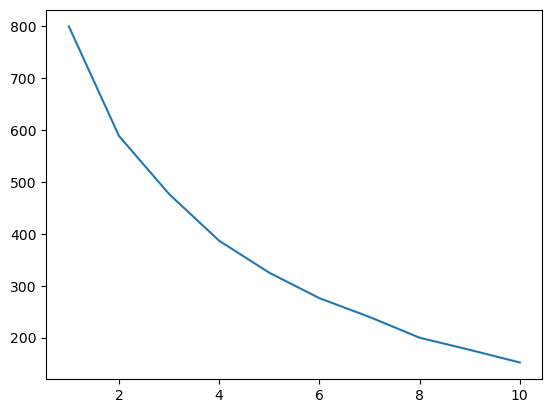

In [109]:
intertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    intertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),intertia_scores3)

In [110]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),hue,Income Cluster,Spending and Income Cluster
0,Male,19,15,39,Male,1,2
1,Male,21,15,81,Male,1,1
2,Female,20,16,6,Female,1,2
3,Female,23,16,77,Female,1,1
4,Female,31,17,40,Female,1,2
...,...,...,...,...,...,...,...
195,Female,35,120,79,Female,2,3
196,Female,45,126,28,Female,2,4
197,Male,32,126,74,Male,2,3
198,Male,32,137,18,Male,2,4


In [111]:
df.to_csv('Clustering.csv')